# GRIP @ The Sparks Foundation

April 2022 - Data Science & Business Analytics Internship

Author - Vijai V

Beginner Level Task

Task1 - Prediction using Supervised ML

To Predict the percentage of a student based on the no. of study hours.

# Dataset Link - http://bit.ly/w-data

In [39]:
#import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [40]:
data_url = "http://bit.ly/w-data"
df = pd.read_csv(data_url)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [41]:
df.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [53]:
df.tail(4)

,Hours,Scores
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [42]:
#check if there any null value in the Dataset
df.isnull == True

False

# As we have found no Null value, so now we can proceed with the Visualization of our Data

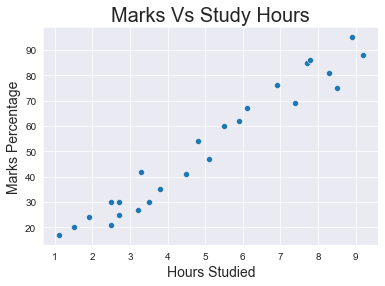

In [43]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours', size = 20)
plt.ylabel('Marks Percentage', size = 14)
plt.xlabel('Hours Studied', size = 14)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation

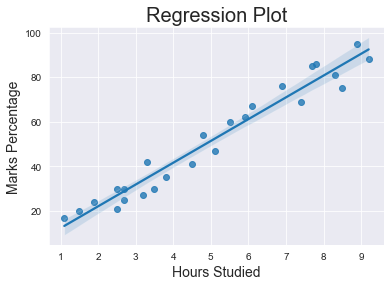

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [44]:
sns.regplot(x=df['Hours'], y=df['Scores'])
plt.title('Regression Plot', size=20)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()
print(df.corr())


It is confirmed that the variables are positively correlated

# Training the Model Here

# 1) Splitting the Data

In [45]:
#Defining x and y from the Data
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#splitting the Data in Two 
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)


# 2) Fitting the Data into the Model

In [54]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print('Model Trained')

Model Trained


# Predicting the Percentage of Marks

In [47]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks

In [48]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visually Comparing the Predicted Marks with the Actual Marks

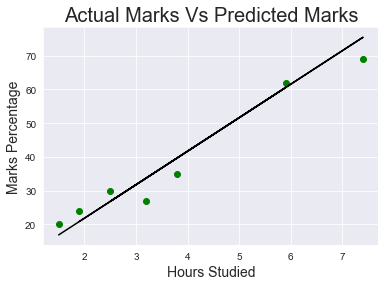

In [49]:
plt.scatter(x=val_x, y=val_y, color='green')
plt.plot(val_x, pred_y, color='black')
plt.title('Actual Marks Vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()


# Evaluating the Model

In [51]:
#calculating the accuracy of the model
print('Mean absolute error:', mean_absolute_error(val_y, pred_y))

Mean absolute error: 4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [52]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks